# Titanic Survival Prediction

***TASK**: Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner*
*project with readily available data.*

### Importing Libraries.

In [295]:
#importing the python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split


In [84]:
import statsmodels.api as sm

### Reading the dataset.

In [5]:
#importing titanic dataset (as it already downloaded from the given link)
df=pd.read_csv("Titanic-Dataset.csv")
# here df is the new dataframe where all the data of titanic is stored.

In [7]:
# first 10 rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# last 10 rows
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
# Number of (rows,columns)
df.shape

(891, 12)

In [13]:
# Size of the Data Frame
df.size

10692

*There are total 10692 data entries*

### Cleaning ang manipulating the data.

In [15]:
# returns all the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the cabin column there are 687 data are null valued so it does not make sense to take that info.

In [17]:
# Filling the null values 
df["Age"]=df["Age"].fillna(df["Age"].mean()).astype(int)

In [21]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


Therefore, there are 314 female and 577 male in the dataset.

In [25]:
df["Embarked"]=df["Embarked"].fillna("S")

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [31]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,1


In [33]:
df.duplicated().sum()
#to check whether there are any duplicate values.

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 73.2+ KB


### Data Visualization

In [212]:
Titanic=df[["PassengerId","Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [41]:
Titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7.2500,1
1,2,1,1,1,38,1,0,71.2833,2
2,3,1,3,1,26,0,0,7.9250,1
3,4,1,1,1,35,1,0,53.1000,1
4,5,0,3,0,35,0,0,8.0500,1


In [43]:
Titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.544332,0.523008,0.381594,32.204208,1.102132
std,257.353842,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.693429,0.514624
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<Axes: >

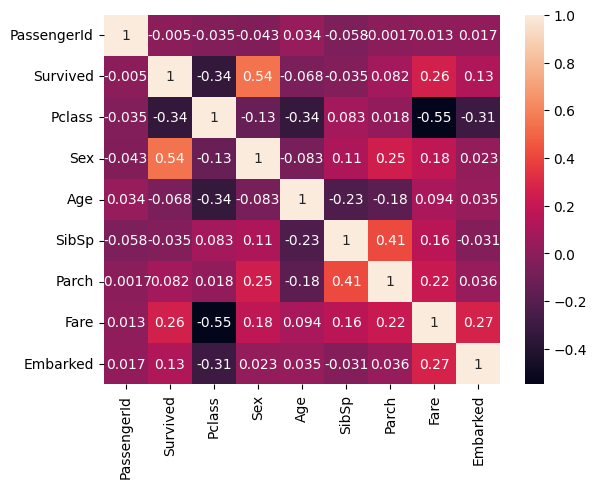

In [53]:
sns.heatmap(Titanic.corr(), annot=True)

Text(0, 0.5, 'No of passengers')

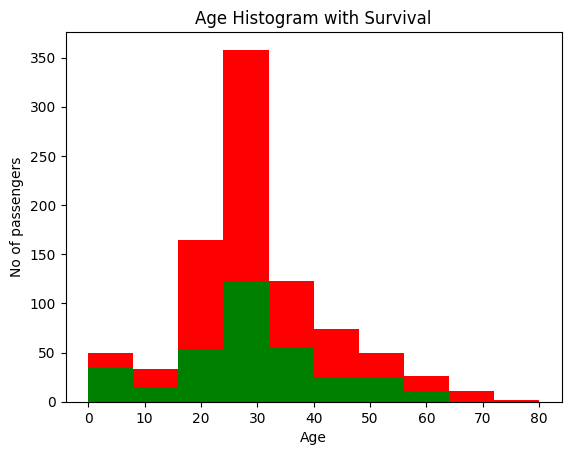

In [214]:
plt.hist(x = [Titanic[Titanic['Survived']==1]['Age'], Titanic[Titanic['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

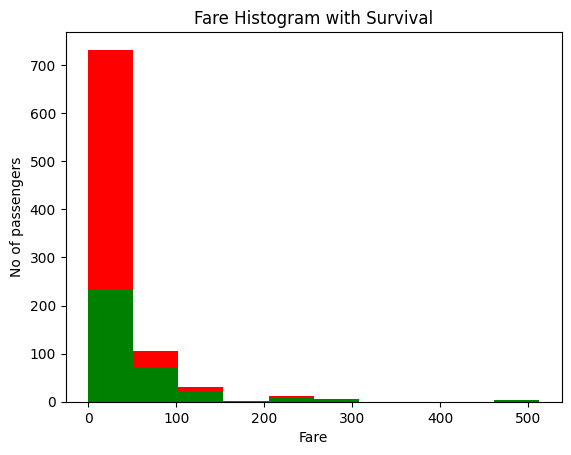

In [218]:
plt.hist(x = [Titanic[Titanic['Survived']==1]['Fare'], Titanic[Titanic['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')

Text(0.5, 1.0, 'Survival Count (0 = No, 1 = Yes)')

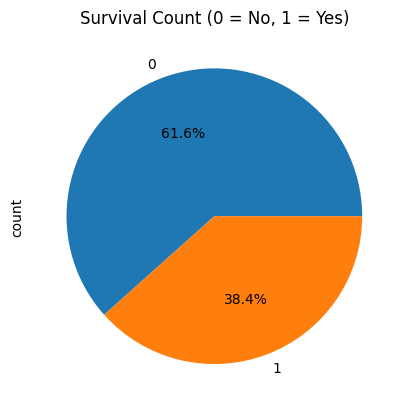

In [275]:
Titanic["Survived"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Survival Count (0 = No, 1 = Yes)')

In [301]:
X= Titanic.drop(['Survived'], axis=1)
y=Titanic["Survived"]

In [303]:
X.tail()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,887,2,0,27,0,0,13.00,1
887,888,1,1,19,0,0,30.00,1
888,889,3,1,29,1,2,23.45,1
889,890,1,0,26,0,0,30.00,2
890,891,3,0,32,0,0,7.75,0


In [305]:
y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

### Data selection

In [244]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

In [246]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


### Model Building.

In [299]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
  
randomforest = RandomForestClassifier() 
  
# Fit the training data along with its output 
randomforest.fit(X_train, y_train) 
y_pred = randomforest.predict(X_test) 
  
# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2) 
print("The accuracy is ",acc_randomforest,"percent.") 

The accuracy is  83.8 percent.
